In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# This strategy is for TLT.

In [3]:
tlt = yf.Ticker("TLT")
df = tlt.history(period = "max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-07-30,41.352743,41.428620,41.236397,41.236397,6100,0.000,0
2002-07-31,41.453924,41.883895,41.428634,41.747314,29400,0.000,0
2002-08-01,41.752351,41.995154,41.752351,41.985039,25000,0.000,0
2002-08-02,42.066005,42.541496,41.924366,42.415035,52800,0.000,0
2002-08-05,42.511106,42.713444,42.414994,42.602158,61100,0.000,0
...,...,...,...,...,...,...,...
2022-12-13,108.776880,108.816784,107.200691,107.440109,23854700,0.000,0
2022-12-14,107.400209,108.058612,106.632062,107.899002,19517500,0.000,0
2022-12-15,108.389999,109.120003,108.160004,108.320000,20246200,0.261,0


In [4]:
df = df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis = 1)
df["Day"] = df.index.day
df["buy"] = [0] * len(df)
df["sell"] = [0] * len(df)
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236397,30,0,0
2002-07-31,41.747314,31,0,0
2002-08-01,41.985039,1,0,0
2002-08-02,42.415035,2,0,0
2002-08-05,42.602158,5,0,0
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [5]:
type(df.index)  # Date index is DateTime type.

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# Set the initial capital
initial_capital= float(10000)

In [7]:
df.loc[
    (
        (df["Day"] >= 25)
        #(df["buy"].shift(1) == 0)
    ),
    
"buy"] = 1

# But this causes adjacent "buy" = 1 values.

df.loc[
    (
 
        (df["Day"] <= 7) &
        (df["Day"] > 3)
        #(df["sell"].shift(1) == 0)
    ),
    
"sell"] = 1

# But this causes adjacent "sell" = 1 values.

df.loc[
    (
        (df["buy"].shift(1) == 1)
    ),
    
"buy"] = 0

# Clean the buy values.

df.loc[
    ( 
        (df["sell"].shift(1) == 1)
    ),
    
"sell"] = 0

# Clean the sell values.

In [8]:
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236397,30,1,0
2002-07-31,41.747314,31,0,0
2002-08-01,41.985039,1,0,0
2002-08-02,42.415035,2,0,0
2002-08-05,42.602158,5,0,1
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [9]:
cash_contracts_equity = [initial_capital, 0, initial_capital]
cash_contracts_equity = np.array([cash_contracts_equity] * len(df))

cash_contracts_equity[0][0] = initial_capital  # cash
cash_contracts_equity[0][1] = 0  # contracts
cash_contracts_equity[0][2] = initial_capital  # equity

cash_contracts_equity

array([[10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       ...,
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.]])

In [10]:
cash_contracts_equity[0][0]

10000.0

In [11]:
df[0:50]

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236397,30,1,0
2002-07-31,41.747314,31,0,0
2002-08-01,41.985039,1,0,0
2002-08-02,42.415035,2,0,0
2002-08-05,42.602158,5,0,1
2002-08-06,42.237953,6,0,0
2002-08-07,42.339130,7,0,0
2002-08-08,42.339130,8,0,0
2002-08-09,42.936035,9,0,0


In [12]:
for index, _row in enumerate(df.iterrows()):
    row = _row[1]
    
    
    if row["buy"] == 1:
        if index == 1:
            cash_contracts_equity[index][1] = (cash_contracts_equity[index][0] / row["Close"])
            cash_contracts_equity[index][0] = 0
        else:
            cash_contracts_equity[index][1] = (cash_contracts_equity[index - 1][0] / row["Close"])
            cash_contracts_equity[index][0] = 0
    
    elif row["sell"] == 1:
        cash_contracts_equity[index][0] = (cash_contracts_equity[index - 1][1] * row["Close"])
        cash_contracts_equity[index][1] = 0
    
    elif row["buy"] == 0 and row["sell"] == 0:
        cash_contracts_equity[index][1] = cash_contracts_equity[index - 1][1]
        cash_contracts_equity[index][0] = cash_contracts_equity[index - 1][0]
    
        
    cash_contracts_equity[index][2] = (cash_contracts_equity[index][0] + (cash_contracts_equity[index][1] * row["Close"]))

In [13]:
cash_contracts_equity[0:10]

array([[    0.        ,   242.5042142 , 10000.        ],
       [    0.        ,   242.5042142 , 10123.89968653],
       [    0.        ,   242.5042142 , 10181.54883211],
       [    0.        ,   242.5042142 , 10285.82479315],
       [10331.20275037,     0.        , 10331.20275037],
       [10331.20275037,     0.        , 10331.20275037],
       [10331.20275037,     0.        , 10331.20275037],
       [10331.20275037,     0.        , 10331.20275037],
       [10331.20275037,     0.        , 10331.20275037],
       [10331.20275037,     0.        , 10331.20275037]])

In [14]:
cash_contracts_equity.T

array([[    0.        ,     0.        ,     0.        , ...,
        15038.36275588, 15038.36275588, 15038.36275588],
       [  242.5042142 ,   242.5042142 ,   242.5042142 , ...,
            0.        ,     0.        ,     0.        ],
       [10000.        , 10123.89968653, 10181.54883211, ...,
        15038.36275588, 15038.36275588, 15038.36275588]])

In [15]:
df["cash"] = cash_contracts_equity.T[0]
df["contracts"] = cash_contracts_equity.T[1]
df["equity"] = cash_contracts_equity.T[2]
df["equity_pc"] = df["equity"].pct_change()
df["TLT_pc"] = df["Close"].pct_change()
df["equity_cr"] = (1 + df["equity_pc"]).cumprod()
df["TLT_cr"] = (1 + df["TLT_pc"]).cumprod()
df = df.fillna(0)
df

,Close,Day,buy,sell,cash,contracts,equity,equity_change_cumsum,TLT_change_cumsum
Date,,,,,,,,,
2002-07-30,41.236397,30,1,0,0.000000,242.504214,10000.000000,NaN,NaN
2002-07-31,41.747314,31,0,0,0.000000,242.504214,10123.899687,0.012390,0.012390
2002-08-01,41.985039,1,0,0,0.000000,242.504214,10181.548832,0.018084,0.018084
2002-08-02,42.415035,2,0,0,0.000000,242.504214,10285.824793,0.028326,0.028326
2002-08-05,42.602158,5,0,1,10331.202750,0.000000,10331.202750,0.032738,0.032738
...,...,...,...,...,...,...,...,...,...
2022-12-13,107.440109,13,0,0,15038.362756,0.000000,15038.362756,0.471868,1.164664
2022-12-14,107.899002,14,0,0,15038.362756,0.000000,15038.362756,0.471868,1.168935
2022-12-15,108.320000,15,0,0,15038.362756,0.000000,15038.362756,0.471868,1.172837


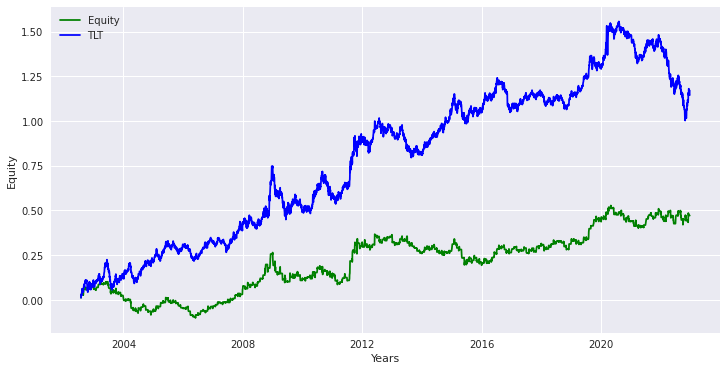

In [16]:
plt.style.use("seaborn")
plt.figure(figsize = (16, 8))
plt.plot(df.index, df["equity_cr"], c = "g", label = "Strategy")
plt.plot(df.index, df["TLT_cr"], c = "b", label = "TLT")
plt.xlabel("Years")
plt.ylabel("Cumulative Compounded Returns")
plt.legend()

In [ ]:
# Annualized sharpe ratios:

df["TLT_sharpe"] = (df["TLT_pc"].rolling(1000).mean() / df["TLT_pc"].rolling(1000).std()) * np.sqrt(252)
df["equity_sharpe"] = (df["equity_pc"].rolling(1000).mean() / df["TLT_pc"].rolling(1000).std()) * np.sqrt(252)

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize = (16, 8))
plt.plot(df.index, df["equity_sharpe"], c = "g", label = "Strategy")
plt.plot(df.index, df["TLT_sharpe"], c = "b", label = "TLT")
plt.xlabel("Years")
plt.ylabel("Rolling Annualized Sharpe Ratio")
plt.legend()

In [ ]:
st.pearsonr(df["TLT_pc"], df["equity_pc"])